_Prerequisite :_

- Create an account on IBMQ: https://quantum-computing.ibm.com/
- Install Qiskit: https://github.com/Qiskit/qiskit

# Configuration
Getting yourself an account from IBMQ.

In [1]:
import qiskit
from qiskit import IBMQ

In [3]:
## legacy code
#Go to your account, copy the token and paste it here.
#IBMQ.save_account('<put your own token>'
#)

In [ ]:
from qiskit_ibm_provider import IBMProvider

# Save your credentials on disk.
# IBMProvider.save_account(token='<IBM Quantum API key>')

provider = IBMProvider(instance='<>/<>/<>')

# Your first quantum program

The quantum version of programming Hello World is programming the __Bell states__.

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

These are entangled states. We can see that this state has 50% probability of being measured in the state  |00⟩ , and 50% chance of being measured in the state  |11⟩ . Most interestingly, it has a 0% chance of being measured in the states  |01⟩  or  |10⟩ . 

This combined state cannot be written as two separate qubit states, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state  |1⟩ , the collective state of our qubits changes like so:

$$\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle$$

In [5]:
from qiskit import *
%matplotlib inline

## Defining qubits and classical bits

In [6]:
qr = QuantumRegister(2)

In [7]:
cr = ClassicalRegister(2)

## Building a circuit

To build a Bell state. We need two gates: A Hadamard Gate and a CNOT gate.

### Steps
1. Let's say we have a two-qubit state |00⟩. We apply a Hadamard gate on our first qubit.
$$\begin{aligned}H|0\rangle &= \frac{1}{\sqrt{2}}\begin{bmatrix}
1 &   1          \\
1 & -1 \\
\end{bmatrix}\begin{bmatrix}
1           \\
0 \\
\end{bmatrix}\\ &=\frac{|0\rangle+|1\rangle}{\sqrt{2}}\end{aligned}$$
We have a qubit in superpostion.

2. Now with the second qubit, we have $S = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle),$ and we apply a CNOT gate with the left qubit as control qubit. 

<img src="./_assets/cnot_gate.png" width="200"/>

Therefore, we obtain:
$$
CNOT(S) =\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$
And we obtain our __Bell state__.


In [8]:
circuit = QuantumCircuit(qr, cr)

In [9]:
circuit.h([0])

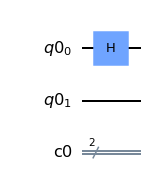

In [10]:
import matplotlib.pylab as plt
fig,ax = plt.subplots(figsize=(4,4))
circuit.draw(output="mpl", ax=ax)
plt.tight_layout()

In [11]:
circuit.cx(qr[0], qr[1])

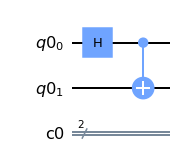

In [12]:
circuit.draw(output="mpl")

In [13]:
circuit.measure(qr, cr)

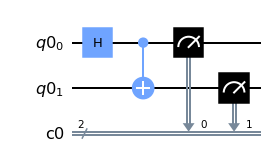

In [14]:
circuit.draw(output="mpl")

## Simulating the circuit
We use the Aer Component of Qiskit to simulate the result on our local machine before sending it to the quantum computer.

In [15]:
simulator = Aer.get_backend("qasm_simulator") # qasm = Quantum Assembly Machine

In [16]:
result = execute(circuit, backend=simulator).result();

## Reading the result

In [17]:
from qiskit.tools.visualization import plot_histogram

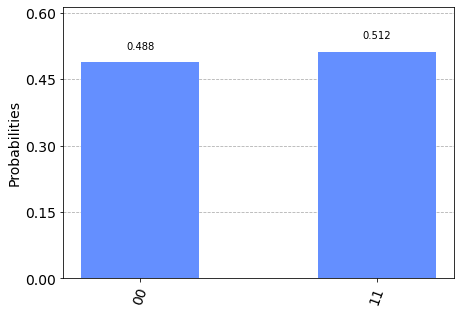

In [18]:
plot_histogram(result.get_counts(circuit))

We get roughly 0.5 probability for the output 00 and 11.  The small error is because we are running a limited number of shots instead of infinite number of shots.

## Sending our circuit to the quantum computer at IBM

In [19]:
provider = IBMQ.get_provider("ibm-q")

In [20]:
# acquiring a backend
# Load IBM Q account and get the least busy backend device
from qiskit.providers.ibmq import least_busy
device = least_busy(
    provider.backends(
        filters=lambda x: x.configuration().n_qubits >= 3 and not x.
        configuration().simulator and x.status().operational == True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_ourense


In [21]:
job = execute(circuit, backend=device)

## Monitoring the job

In [22]:
from qiskit.tools.monitor import job_monitor

In [23]:
job_monitor(job)


Job Status: job has successfully run


In [24]:
result = job.result()

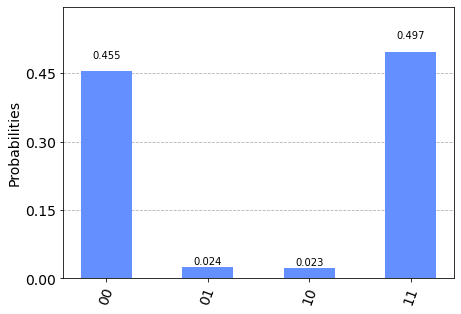

In [25]:
plot_histogram(result.get_counts(circuit))

# Conclusion
Looking at this result, we can see that the probability is non-zero for state 01 and 10. Why?

The simulator simulates the perfect quantum device, in the mean time the real quantum device is susceptible to small quantum errors. This small quantum errors will be reduced as the technology improves.